In [1]:
import pandas as pd
import numpy as np
import re
import json
import csv
import threading
import os

## Read in WSB json

In [2]:
with open('wsbData.json', 'r') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)

## Read in Company Tickers

In [3]:
df_company = pd.read_csv("companylist.csv")
df_company.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,YI,"111, Inc.",6.00,4.790733e+07,7984555.0,2018.0,Health Care,Medical/Nursing Services,https://www.nasdaq.com/symbol/yi,NaN
1,PIH,"1347 Property Insurance Holdings, Inc.",3.89,2.331056e+07,NaN,2014.0,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,NaN
2,PIHPP,"1347 Property Insurance Holdings, Inc.",16.70,0.000000e+00,NaN,NaN,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pihpp,NaN
3,TURN,180 Degree Capital Corp.,1.83,5.695246e+07,NaN,NaN,Finance,Finance/Investors Services,https://www.nasdaq.com/symbol/turn,NaN
4,FLWS,"1-800 FLOWERS.COM, Inc.",10.99,7.053203e+08,NaN,1999.0,Consumer Services,Other Specialty Stores,https://www.nasdaq.com/symbol/flws,NaN


In [4]:
tickers = df_company["Symbol"]
tickers.head()

0       YI
1      PIH
2    PIHPP
3     TURN
4     FLWS
Name: Symbol, dtype: object

## Extract Tickers

In [5]:
def extract_tickers(string):
    e = re.findall('[A-Z]{1,4}|\d{1,3}(?=\.)|\d{4,}', string)
    return list(set(e).intersection(set(tickers.values)))

In [6]:
df["tickers"] = df["body"].apply(extract_tickers)

In [7]:
df["datetime"] = pd.to_datetime(df["created_utc"],unit='s')

In [8]:
df.head()

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,...,controversiality,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished,tickers,datetime
0,[deleted],0.0,1.0,t1_chi0ufo,[deleted],0.0,1400098596,t5_2th52,t3_25jeio,t1_chhzelx,...,0,0,chi0ufo,wallstreetbets,0.0,NaN,NaN,NaN,[],2014-05-14 20:16:36
1,"Lol. Yeah, Welp.",0.0,0.0,t1_cl52foo,JamesAQuintero,0.0,1412888184,t5_2th52,t3_2ikdc5,t1_cl47s92,...,0,0,cl52foo,wallstreetbets,1.0,NaN,NaN,NaN,[],2014-10-09 20:56:24
2,[deleted],0.0,1.0,t1_ch5wdhy,[deleted],0.0,1398860210,t5_2th52,t3_24a77l,t1_ch5diku,...,0,0,ch5wdhy,wallstreetbets,1.0,NaN,NaN,NaN,[],2014-04-30 12:16:50
3,Crypto miners is not a significant enough mark...,0.0,1.0,t1_cfj9fzo,Zytran,0.0,1392824901,t5_2th52,t3_1y409u,t3_1y409u,...,0,0,cfj9fzo,wallstreetbets,1.0,NaN,NaN,NaN,[AMD],2014-02-19 15:48:21
4,Sold a covered call at 560. I almost wish it d...,0.0,1.0,t1_ch0jw88,FarmPal,0.0,1398311440,t5_2th52,t3_23sjde,t3_23sjde,...,0,0,ch0jw88,wallstreetbets,1.0,NaN,NaN,NaN,[],2014-04-24 03:50:40


In [59]:
flatten_df = df[df["tickers"].apply(len) != 0].explode('tickers')

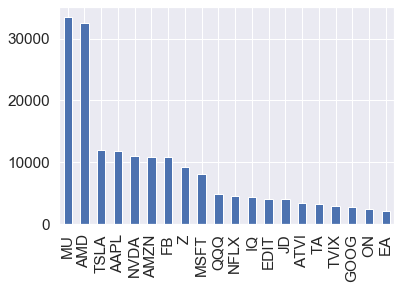

In [64]:
flatten_df["tickers"].value_counts().iloc[0:20].plot.bar()

## Look at Tesla

In [9]:
import yfinance as yf
import yahoofinancials

In [119]:
tesla_df = flatten_df[flatten_df['tickers'] == 'TSLA']

In [120]:
tesla_df["Date"] = tesla_df["datetime"].dt.date

/Users/anishyakkala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
tesla_df.sort_values('datetime').head()

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,...,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished,tickers,datetime,Date
501599,"TSLA, SSYS, SCTY, OHI, RVBD",0.0,1.0,t1_c9bb17o,chakre,0.0,1365472194,t5_2th52,t3_1by3yi,t3_1by3yi,...,0,c9bb17o,wallstreetbets,1.0,NaN,NaN,NaN,TSLA,2013-04-09 01:49:54,2013-04-09
486147,"*Zing!*\n\nJROD teach me your ways. I am noob,...",0.0,1.0,t1_c9v5660,Ozymandias_Reborn,0.0,1368057320,t5_2th52,t3_1dxnuu,t1_c9v1py7,...,0,c9v5660,wallstreetbets,2.0,NaN,NaN,NaN,TSLA,2013-05-08 23:55:20,2013-05-08
364121,I like the move esp in the short run although ...,0.0,1.0,t1_c9vntpf,jk4122,0.0,1368127953,t5_2th52,t3_1e0mbt,t3_1e0mbt,...,0,c9vntpf,wallstreetbets,1.0,NaN,NaN,NaN,TSLA,2013-05-09 19:32:33,2013-05-09
337471,I'm very curious what you paid here. On my bid...,0.0,1.0,t1_c9w1o7z,rawbdor,0.0,1368174074,t5_2th52,t3_1e0mbt,t1_c9vnwxu,...,0,c9w1o7z,wallstreetbets,2.0,NaN,monopoly,NaN,TSLA,2013-05-10 08:21:14,2013-05-10
178835,I actually did play a oom strangle on TSLA bef...,0.0,1.0,t1_c9w9phn,[deleted],0.0,1368208590,t5_2th52,t3_1e0mbt,t1_c9w9jr6,...,0,c9w9phn,wallstreetbets,1.0,NaN,NaN,NaN,TSLA,2013-05-10 17:56:30,2013-05-10


In [122]:
min_date = tesla_df.sort_values('datetime').iloc[0]["datetime"].date()
max_date = tesla_df.sort_values('datetime', ascending= False).iloc[0]["datetime"].date()

In [123]:
tesla_stock = yf.download("TSLA", start = str(min_date), end = str(max_date))

tesla_stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-09,41.799999,41.830002,40.330002,40.500000,40.500000,1696100
2013-04-10,40.700001,42.009998,40.610001,41.860001,41.860001,2121100
2013-04-11,42.060001,44.549999,41.750000,43.590000,43.590000,3447400
2013-04-12,43.250000,45.139999,43.049999,43.750000,43.750000,3149400
2013-04-15,43.500000,43.799999,42.509998,43.299999,43.299999,1681400


In [124]:
tesla_df["weekday"] = tesla_df["datetime"].dt.day_name()

/Users/anishyakkala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


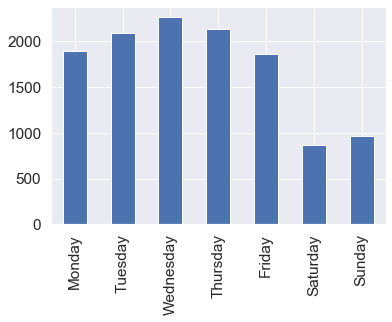

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

tesla_df['weekday'].value_counts().loc[order].plot.bar()

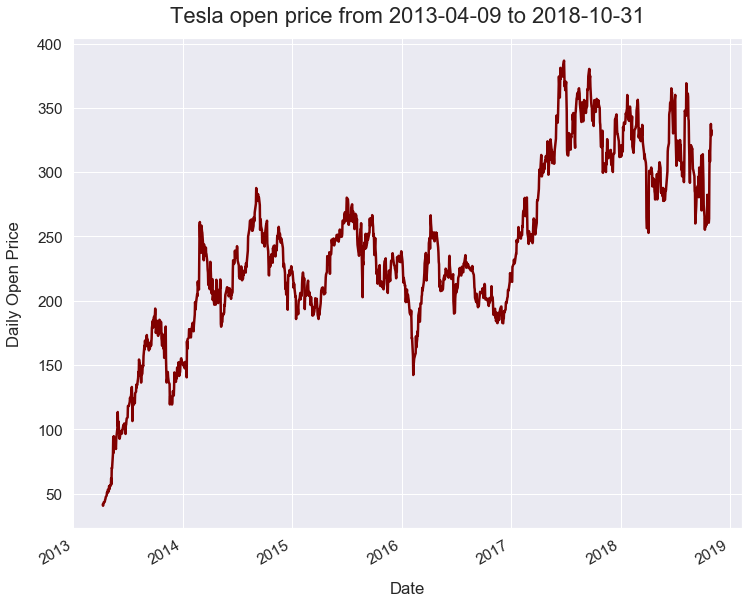

In [126]:
sns.set(font_scale=1.4)
tesla_stock['Open'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Open Price", labelpad=15)
plt.title("Tesla open price from {0} to {1}".format(str(min_date), str(max_date)), y=1.02, fontsize=22);

In [127]:
tesla_df["sell"] = tesla_df["body"].str.lower().str.contains('(sell|short)')

/Users/anishyakkala/Library/Python/3.6/lib/python/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/anishyakkala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


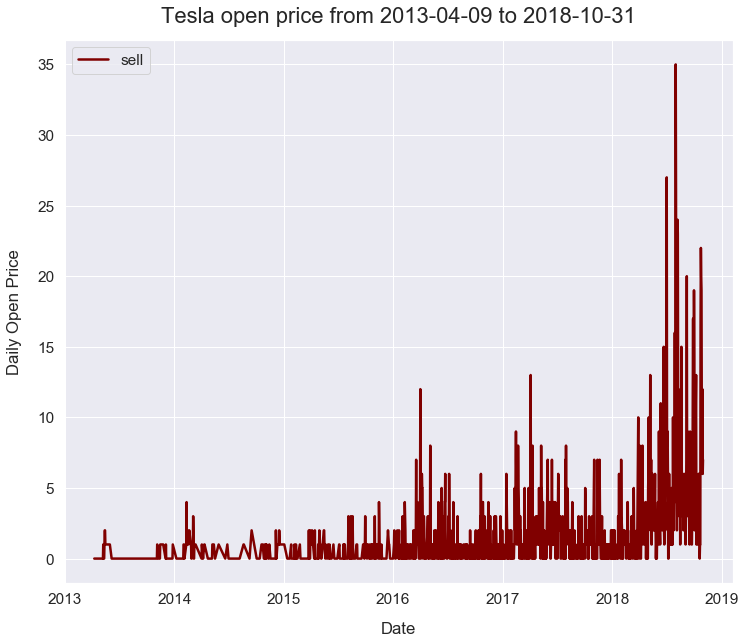

In [128]:
sns.set(font_scale=1.4)
tesla_df[['Date','sell']].groupby('Date').agg('sum').plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Open Price", labelpad=15)
plt.title("Tesla open price from {0} to {1}".format(str(min_date), str(max_date)), y=1.02, fontsize=22);

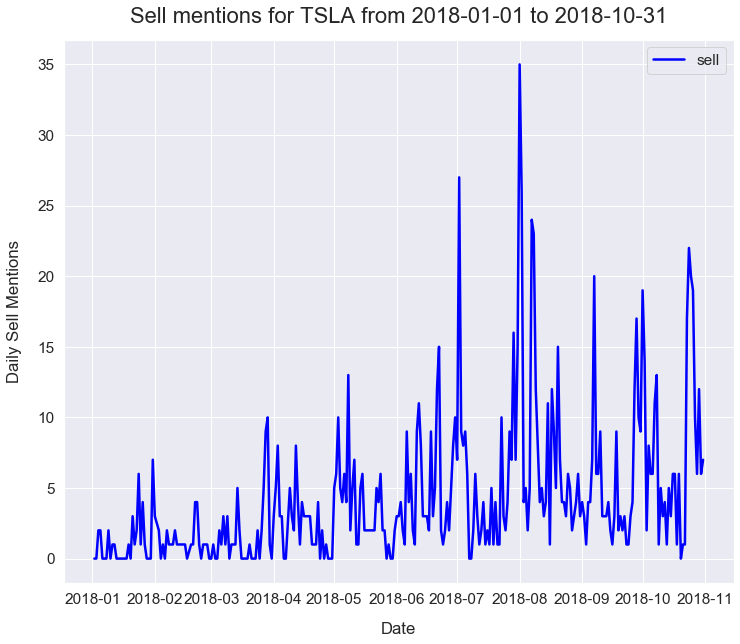

In [130]:
agg_sell = tesla_df[['Date','sell']].groupby('Date').agg('sum')

mask = (agg_sell.index > pd.to_datetime("2018-01-01").date()) & (agg_sell.index <= max_date)

agg_sell.loc[mask].plot(figsize=(12, 10), linewidth=2.5, color='blue')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Sell Mentions", labelpad=15)
plt.title("Sell mentions for TSLA from {0} to {1}".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);


In [149]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

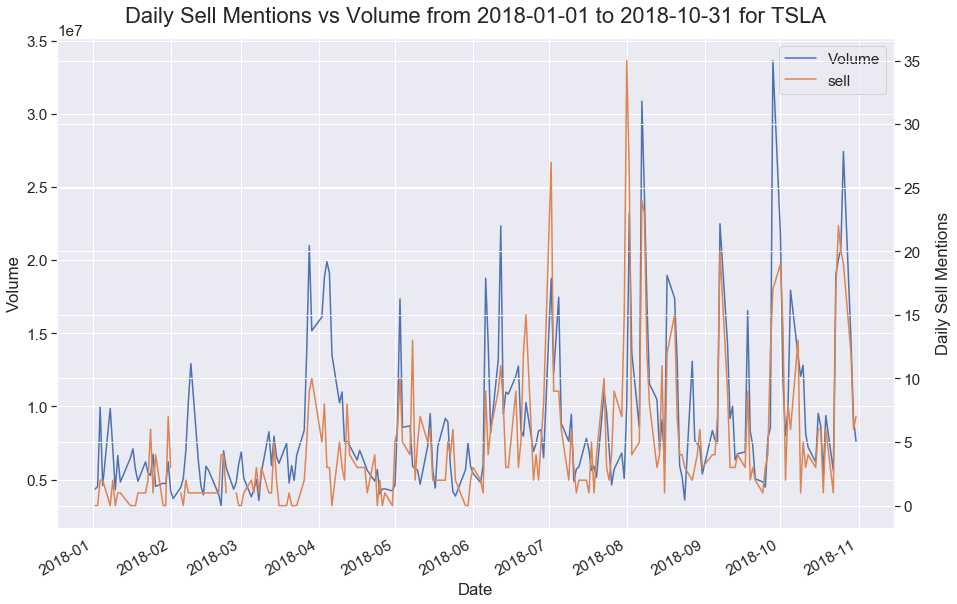

In [156]:
mask = (tesla_stock.index > np.datetime64("2018-01-01")) & (tesla_stock.index <= np.datetime64(max_date))

plot_multi(tesla_stock.loc[mask].join(other = agg_sell)[['Volume','sell']], figsize=(15,10))

plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Sell Mentions", labelpad=15)
plt.title("Daily Sell Mentions vs Volume from {0} to {1} for TSLA".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);

## Sentiment Analysis

Note: the `extract_buy_or_sell` algorithm is heavily leveraged from https://github.com/theriley106/TheWSBIndex

In [195]:
def isTicker(stringVal):
    IS_TICKER = re.compile("[A-Z]{1,4}|\d{1,3}(?=\.)|\d{4,}")
    if IS_TICKER.match(stringVal):
        return stringVal in set(tickers.values)
    return False

def extract_buy_or_sell(string):
    info = {'puts': [], 'calls': [], 'buy': [], 'sell': []}
    # Extracts the words buy or sell from the comment
    for val in re.split("(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", string):
        # This splits the string into sentences
        allWords = re.findall("\w+", str(val))
        while len(allWords) > 0:
            word = allWords.pop(0)
            if re.match("[\W]?([Bb]uy)[\W]?", word):
                # This means it's the word buy
                tempList = []
                while len(allWords) > 0:
                    newWord = allWords.pop(0)
                    if isTicker(newWord):
                        tempList.append(newWord)
                    elif re.match("[\W]?([Pp]ut[s]?)[\W]?", newWord):
                        if len(tempList) > 0:
                            # This means a sentence like
                            # put $5 in TSLA
                            while len(tempList) > 0:
                                info['puts'].append(tempList.pop())
                            break

                    elif re.match("[\W]?([Cc]all[s]?)[\W]?", newWord):
                        if len(tempList) > 0:
                            # This means a sentence like
                            # call my friend to put $5 in TSLA
                            while len(tempList) > 0:
                                info['calls'].append(tempList.pop())
                            break
                info['buy'] += tempList

            elif re.match("[\W]?[Ss]horting?[\W]?", word):
                while len(allWords) > 0:
                    newWord = allWords.pop(0)
                    if isTicker(newWord):
                        info['sell'].append(newWord)
                    else:
                        break

            elif re.match("[\W]?([Ss]ell|[Ss]old|[Cc]los[(e|ing)]|[Ss]hort[s]?)[\W]?", word):
                # This means it's indicating they want to sell
                # Sell TSLA puts would be equivilant to a call
                tempList = []
                while len(allWords) > 0:
                    newWord = allWords.pop(0)
                    if isTicker(newWord):
                        tempList.append(newWord)
                    elif re.match("[\W]?([Pp]ut[s]?)[\W]?", newWord):
                        if len(tempList) > 0:
                            # This means a sentence like
                            # put $5 in TSLA
                            while len(tempList) > 0:
                                info['calls'].append(tempList.pop())
                            break

                    elif re.match("[\W]?([Cc]all[s]?)[\W]?", newWord):
                        if len(tempList) > 0:
                            # This means a sentence like
                            # call my friend to put $5 in TSLA
                            while len(tempList) > 0:
                                info['puts'].append(tempList.pop())
                            break

                    elif re.match("[Ss]hort[s]?", newWord):
                        # IE closing out a short == buy
                        if len(tempList) > 0:
                            # This means a sentence like
                            # call my friend to put $5 in TSLA
                            while len(tempList) > 0:
                                info['buy'].append(tempList.pop())
                            break

                info['sell'] += tempList

            elif isTicker(word):
                tempList = [word]
                while len(allWords) > 0:
                    newWord = allWords.pop(0)
                    if isTicker(newWord):
                        tempList.append(newWord)
                    elif re.match("[\W]?([Pp]ut[s]?)[\W]?", newWord):
                        if len(tempList) > 0:
                            # This means a sentence like
                            # put $5 in TSLA
                            while len(tempList) > 0:
                                info['puts'].append(tempList.pop())
                            break

                    elif re.match("[\W]?([Cc]all[s]?)[\W]?", newWord):
                        if len(tempList) > 0:
                            # This means a sentence like
                            # call my friend to put $5 in TSLA
                            while len(tempList) > 0:
                                info['calls'].append(tempList.pop())
                            break
                info['buy'] += tempList
    # Remove duplicates from lists
    for key, val in info.items():
        temp_list = list(dict.fromkeys(info[key]))
        info[key] = temp_list
    return info

In [197]:
import swifter

df["sentiment"] = df["body"].swifter.apply(extract_buy_or_sell)

In [198]:
import pickle
# save the sentiment dataset because it took a fat time to run
pickle.dump(df, open("wsb.pkl", "wb"))

In [ ]:
flatten_df = df.explode('tickers')

In [222]:
tesla_df = flatten_df[flatten_df['tickers'] == "TSLA"]

tesla_sent = pd.concat([tesla_df.drop(['sentiment'], axis=1), tesla_df['sentiment'].apply(pd.Series)], axis=1)

In [231]:
tesla_sent["puts"] = ((tesla_sent["puts"].apply(len) != 0) & 
                      (tesla_sent["buy"].astype('str').str.contains('TSLA'))).astype(int)
tesla_sent["calls"] = ((tesla_sent["calls"].apply(len) != 0) & 
                       (tesla_sent["calls"].astype('str').str.contains('TSLA'))).astype(int)
tesla_sent["buy"] = ((tesla_sent["buy"].apply(len) != 0) & 
                     (tesla_sent["buy"].astype('str').str.contains('TSLA'))).astype(int)
tesla_sent["sell"] = ((tesla_sent["sell"].apply(len) != 0) & 
                      (tesla_sent["sell"].astype('str').str.contains('TSLA'))).astype(int)

In [239]:
tesla_sent["Date"] = tesla_df["datetime"].dt.date

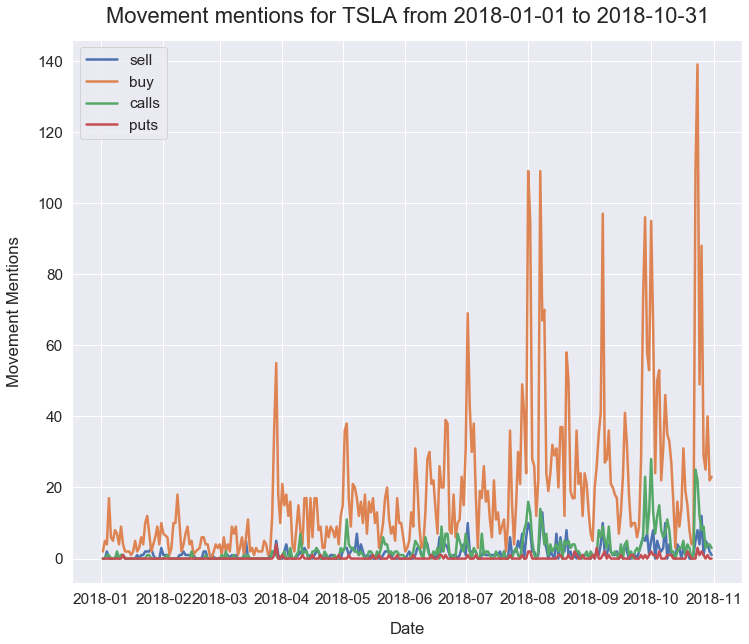

In [248]:
agg_sell = tesla_sent[['Date','sell','buy','calls','puts']].groupby('Date').agg('sum')

mask = (agg_sell.index > pd.to_datetime("2018-01-01").date()) & (agg_sell.index <= max_date)

agg_sell.loc[mask].plot(figsize=(12, 10), linewidth=2.5)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Movement Mentions", labelpad=15)
plt.title("Movement mentions for TSLA from {0} to {1}".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);

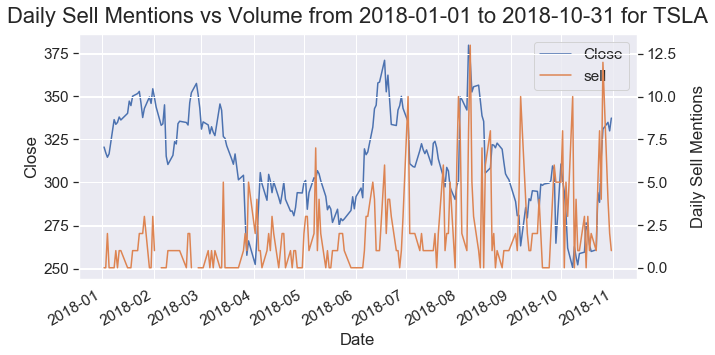

In [278]:
mask = (tesla_stock.index > np.datetime64("2018-01-01")) & (tesla_stock.index <= np.datetime64(max_date))

plot_multi(tesla_stock.loc[mask].join(other = agg_sell)[['Close','sell']], figsize=(10,5))

plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Sell Mentions", labelpad=15)
plt.title("Daily Sell Mentions vs Volume from {0} to {1} for TSLA".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);

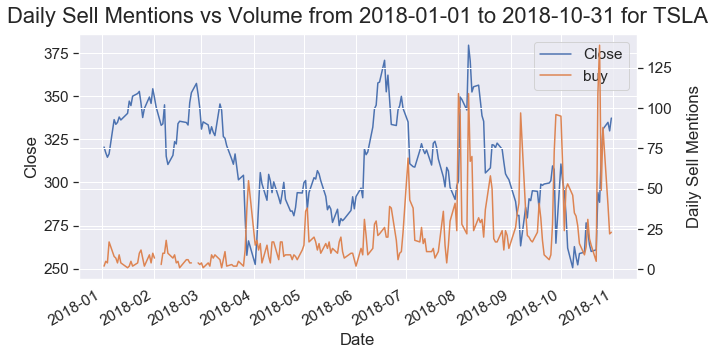

In [279]:
mask = (tesla_stock.index > np.datetime64("2018-01-01")) & (tesla_stock.index <= np.datetime64(max_date))

plot_multi(tesla_stock.loc[mask].join(other = agg_sell)[['Close','buy']], figsize=(10,5))

plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Sell Mentions", labelpad=15)
plt.title("Daily Sell Mentions vs Volume from {0} to {1} for TSLA".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);

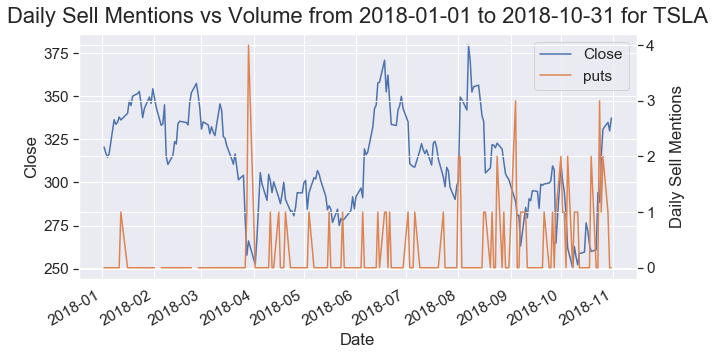

In [280]:
mask = (tesla_stock.index > np.datetime64("2018-01-01")) & (tesla_stock.index <= np.datetime64(max_date))

plot_multi(tesla_stock.loc[mask].join(other = agg_sell)[['Close','puts']], figsize=(10,5))

plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Sell Mentions", labelpad=15)
plt.title("Daily Sell Mentions vs Volume from {0} to {1} for TSLA".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);

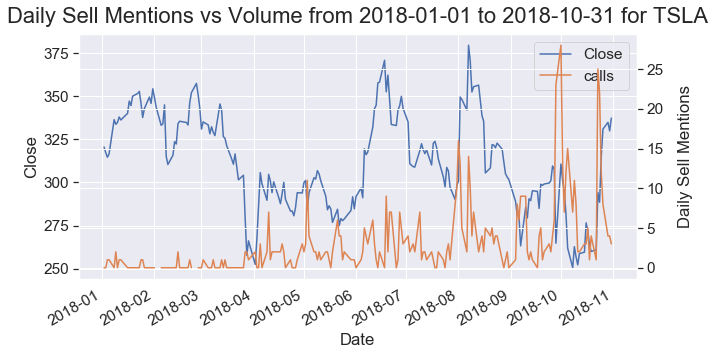

In [281]:
mask = (tesla_stock.index > np.datetime64("2018-01-01")) & (tesla_stock.index <= np.datetime64(max_date))

plot_multi(tesla_stock.loc[mask].join(other = agg_sell)[['Close','calls']], figsize=(10,5))

plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Sell Mentions", labelpad=15)
plt.title("Daily Sell Mentions vs Volume from {0} to {1} for TSLA".format(str("2018-01-01"), str(max_date)), y=1.02, fontsize=22);